# Project Portfolio: Implementing the UCB Algorithm for Ads Click-Through Rate Optimization

Author : Malick .H.B

## Introduction
In the world of online advertising, optimizing the click-through rate (CTR) is crucial for maximizing the effectiveness of ad campaigns. The Kaggle dataset "ads_CTR_customers" provides a valuable opportunity to explore and implement the Upper Confidence Bound (UCB) algorithm, a popular method for optimizing CTR in multi-armed bandit problems. This portfolio outlines the steps involved in utilizing the UCB algorithm to optimize ad selections and provides a detailed explanation along with the code implementation.

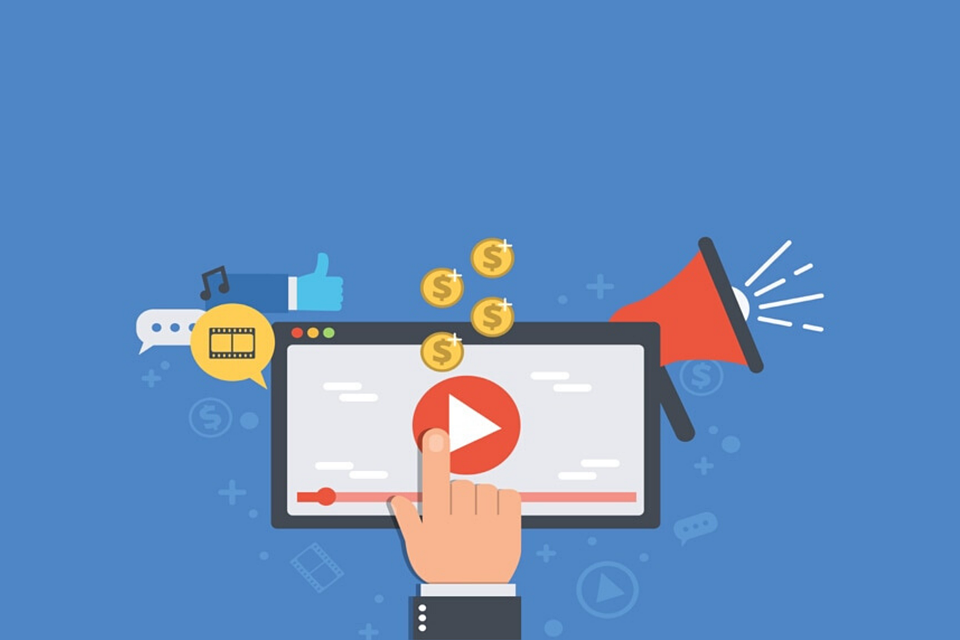

## Dataset Overview
The "ads_CTR_customers" dataset contains simulated click-through rate data for different ads shown to customers. Each row represents a customer's interaction with a specific ad, and the dataset includes information such as customer ID, ad ID, whether the ad was clicked, and more. The goal of the project is to use this data to determine which ads to display to customers in order to maximize the overall click-through rate.

## Upper Confidence Bound (UCB) Algorithm
The UCB algorithm is a popular approach for solving the exploration-exploitation trade-off in multi-armed bandit problems. In the context of ad selection, the algorithm helps strike a balance between showing ads that are currently performing well (exploitation) and exploring new ads to potentially identify even better-performing ones (exploration).
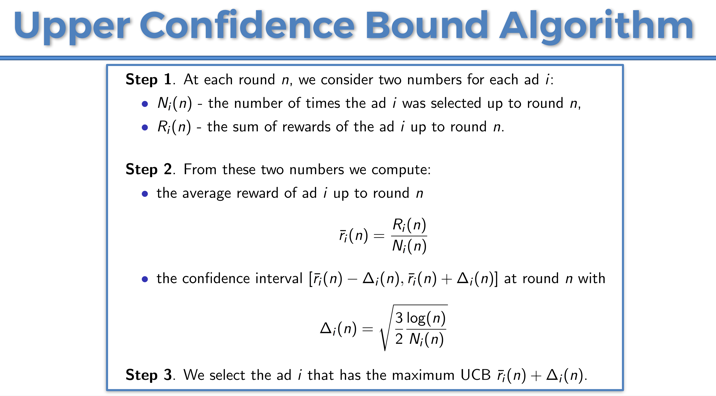

The UCB algorithm estimates the expected reward (CTR in this case) for each ad and calculates a confidence bound that represents the uncertainty in the estimate. The ad with the highest upper confidence bound is chosen to be displayed to the next customer.

## Data Preprocessing

### Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### Importing the dataset

In [3]:
# Loading the dataset
dataset =  pd.read_csv('Ads_CTR_Optimisation.csv')

In [4]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [9]:
dataset.shape

(10000, 10)

## Implementing the UCB algorithm

In [19]:
# Initialization: Initialize variables to keep track of the number of times
# each ad has been shown (N) and the sum of rewards obtained for each ad (sum_rewards).
N = dataset.shape[0]  # Total number of customers
d = dataset.shape[1]  # Number of ads
ads_selected = []
numbers_of_selections = [0] * d  # Initialize the number of selections for each ad
sums_of_rewards = [0] * d  # Initialize the sum of rewards for each ad
total_reward = 0

# Loop through each customer
for n in range(0, N):
    ad = 0
    max_upper_bound = 0

    # Choose the ad with the highest upper confidence bound
    for i in range(0, d):
        if numbers_of_selections[i] > 0:
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400  # Set a large upper bound for unselected ads

        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i

    # Update selections, rewards, and total rewards
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]  # Access values using .values
    sums_of_rewards[ad] += reward
    total_reward += reward

# Calculate total clicks from selected ads
total_clicks = sum(dataset.values[np.arange(N), ads_selected])

# Calculate and print the click-through rate
ctr = total_clicks / N
print("Click-Through Rate:", ctr)

Click-Through Rate: 0.2178


In [20]:
numbers_of_selections

[705, 387, 186, 345, 6323, 150, 292, 1170, 256, 186]

In [21]:
sums_of_rewards

[120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]

## Visualising the results

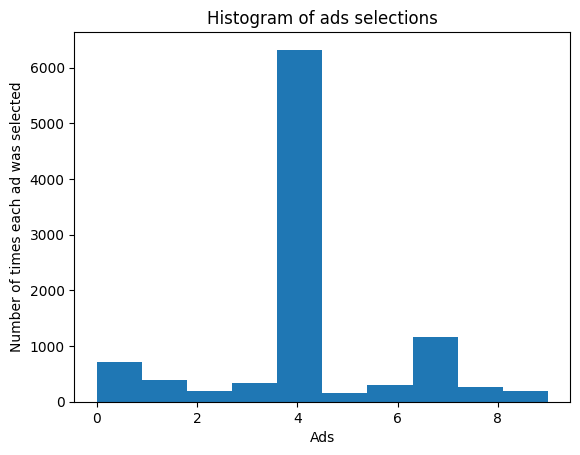

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

## Conclusion
The ad of index # 4 meaning the Ad 5 was clearly the ad that waas selected the most by the customers therefore we could tell it was the Ad with the highest click trough rate.We could infer that this ad must be the must attractive to the future customers.